In [1]:
from keras.backend import shape
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.layers import LSTM
import matplotlib.pyplot as plt
import numpy as np

import keras
import keras.utils
from keras import utils as np_utils

from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, auc

from sklearn.decomposition import PCA

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf


from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
#from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
#  ConvLSTM
from keras.layers import Dense, Activation, Input, LSTM, Bidirectional, Dropout
from keras.models import Sequential, Model
from keras.layers import Conv1DTranspose, Conv1D, MaxPooling1D

from tensorflow.python.client import device_lib

In [3]:
data = pd.read_csv('dataset1.csv')



data.dropna(inplace = True)
data.drop_duplicates(inplace = True)
print(data.isnull().sum())

#print(data_full.info())
print(data.shape)

#print(data.isnull().sum())
#print(data_full['pi'].describe())

#print(data_full['flw'].isnull())
#print(data.describe())
#print(data_full['class'] < 0.0)

y = data["isFake"]
X = data.drop("isFake", 1)

userFollowerCount      0
userFollowingCount     0
userBiographyLength    0
userMediaCount         0
userHasProfilPic       0
userIsPrivate          0
usernameDigitCount     0
usernameLength         0
isFake                 0
dtype: int64
(1165, 9)


<ipython-input-3-90f10bca9a61>:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop("isFake", 1)


In [82]:
scaler = MinMaxScaler(feature_range = (0,1))
x = scaler.fit_transform(X)

x = x.reshape(1165, 1, 8)

X_train, X_test, y_train , y_test = train_test_split(x , y, test_size=0.3 , random_state = 72)
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)
print ('y_train: ', y_train.shape)
print ('y_test: ', y_test.shape)


model = models.Sequential()

model.add(LSTM(512,input_shape=(X_train.shape[1], X_train.shape[2]),activation='relu', return_sequences =True))
model.add(LSTM(256,input_shape=(X_train.shape[1], X_train.shape[2]),activation='relu', return_sequences =True))
model.add(LSTM(64,input_shape=(X_train.shape[1], X_train.shape[2]),activation='relu', return_sequences =True))


model.add(Dense(64, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(64 , kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.2))






model.add(layers.Dense(1, activation='sigmoid'))
# FIT / TRAIN model

model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=25, epochs=100,validation_data=(X_test,y_test) )

X_train:  (815, 1, 8)
X_test:  (350, 1, 8)
y_train:  (815,)
y_test:  (350,)
Epoch 1/100
33/33 [==============================] - 4s 36ms/step - loss: 0.7621 - accuracy: 0.8123 - val_loss: 0.6075 - val_accuracy: 0.8400
Epoch 2/100
33/33 [==============================] - 1s 25ms/step - loss: 0.5478 - accuracy: 0.8233 - val_loss: 0.3982 - val_accuracy: 0.8400
Epoch 3/100
33/33 [==============================] - 1s 34ms/step - loss: 0.3685 - accuracy: 0.8969 - val_loss: 0.2977 - val_accuracy: 0.9229
Epoch 4/100
33/33 [==============================] - 1s 32ms/step - loss: 0.2830 - accuracy: 0.9166 - val_loss: 0.2307 - val_accuracy: 0.9429
Epoch 5/100
33/33 [==============================] - 1s 27ms/step - loss: 0.2507 - accuracy: 0.9252 - val_loss: 0.2075 - val_accuracy: 0.9486
Epoch 6/100
33/33 [==============================] - 1s 24ms/step - loss: 0.2498 - accuracy: 0.9276 - val_loss: 0.1781 - val_accuracy: 0.9543
Epoch 7/100
33/33 [==============================] - 1s 23ms/step - loss

In [84]:
results = model.evaluate(X_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

11/11 [==============================] - 0s 6ms/step - loss: 0.0906 - accuracy: 0.9657
____________________________________________________________________________________________________
Test Loss and Accuracy
results  [0.09057395905256271, 0.9657142758369446]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [87]:
p_pred = model.predict(X_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))
# [1. 0.01 0.91 0.87 0.06 0.95 0.24 0.58 0.78 ...

# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

11/11 [==============================] - 0s 4ms/step
[0.66 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.55 0.   0.   0.99 0.   1.   0.   0.   0.   0.   0.   1.   0.
 1.   0.   0.   0.   0.   0.   0.   0.   0.12 0.   0.   1.   0.   0.
 0.   0.   0.   0.28 0.99 0.   0.   0.   0.97 0.   0.   0.   0.   1.
 0.   0.   0.   0.37 0.   0.   0.56 0.   0.   0.   0.   0.   0.   0.03
 0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.12 0.26 0.   0.   0.   0.   0.   0.   0.   0.   1.   0.01 0.
 0.   1.   0.   0.   0.58 0.   0.   0.   0.01 0.   0.54 0.   0.   0.
 0.   0.1  1.   0.92 0.88 0.33 0.   0.14 0.01 0.   0.96 0.   0.01 0.
 0.   0.93 1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.3  0.95
 0.   0.   0.   1.   1.   0.   0.   0.   0.   0.   0.   0.02 0.92 0.
 0.   0.97 0.   0.   0.   0.   0.   0.   0.55 0.   0.   0.   0.   0.
 1.   0.   0.   0.   0.   0.   0.   0.22 0.9  1.   1.   0.02 0.   0.
 0.05 0.   0.   0.   0.   0.   1.   0.   1.   

In [88]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)

print('F1 score: %f' % f1)


Accuracy: 0.965714
Recall: 0.892857
F1 score: 0.892857


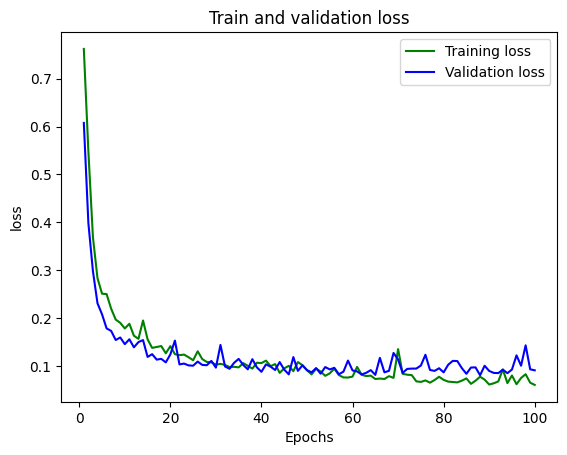

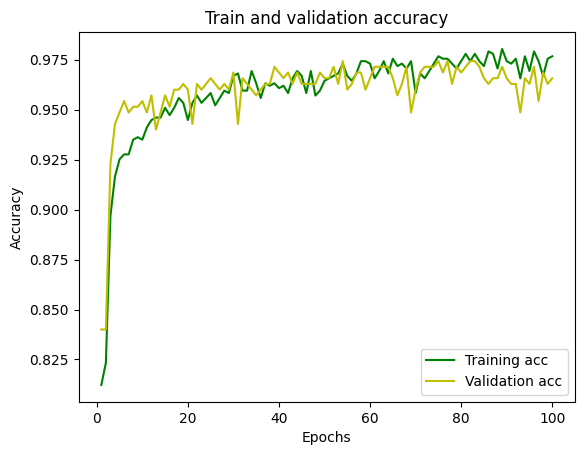

In [89]:
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+ 1)
plt.plot(epochs ,loss,'g',label='Training loss')
plt.plot(epochs ,val_loss,'b',label='Validation loss')
plt.title('Train and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs ,acc,'g',label='Training acc')
plt.plot(epochs ,val_acc,'y',label='Validation acc')
plt.title('Train and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()